In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_petrol_consumption_train.csv")

df_test = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_petrol_consumption_test.csv")

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    38 non-null     float64
 1   Average_income                38 non-null     int64  
 2   Paved_Highways                38 non-null     int64  
 3   Population_Driver_licence(%)  38 non-null     float64
 4   Petrol_Consumption            38 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 1.6 KB


In [3]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,38.0,7.646842,1.003737,5.000,7.000,7.5000,8.00000,10.000
Average_income,38.0,4272.921053,603.724314,3063.000,3739.000,4298.0000,4685.25000,5342.000
Paved_Highways,38.0,5744.973684,3717.940323,602.000,3329.250,4705.5000,7834.00000,17782.000
Population_Driver_licence(%),38.0,0.569447,0.057805,0.451,0.529,0.5645,0.59975,0.724
Petrol_Consumption,38.0,578.789474,118.610687,344.000,508.500,563.5000,634.25000,968.000


/workspaces/model_comparison/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


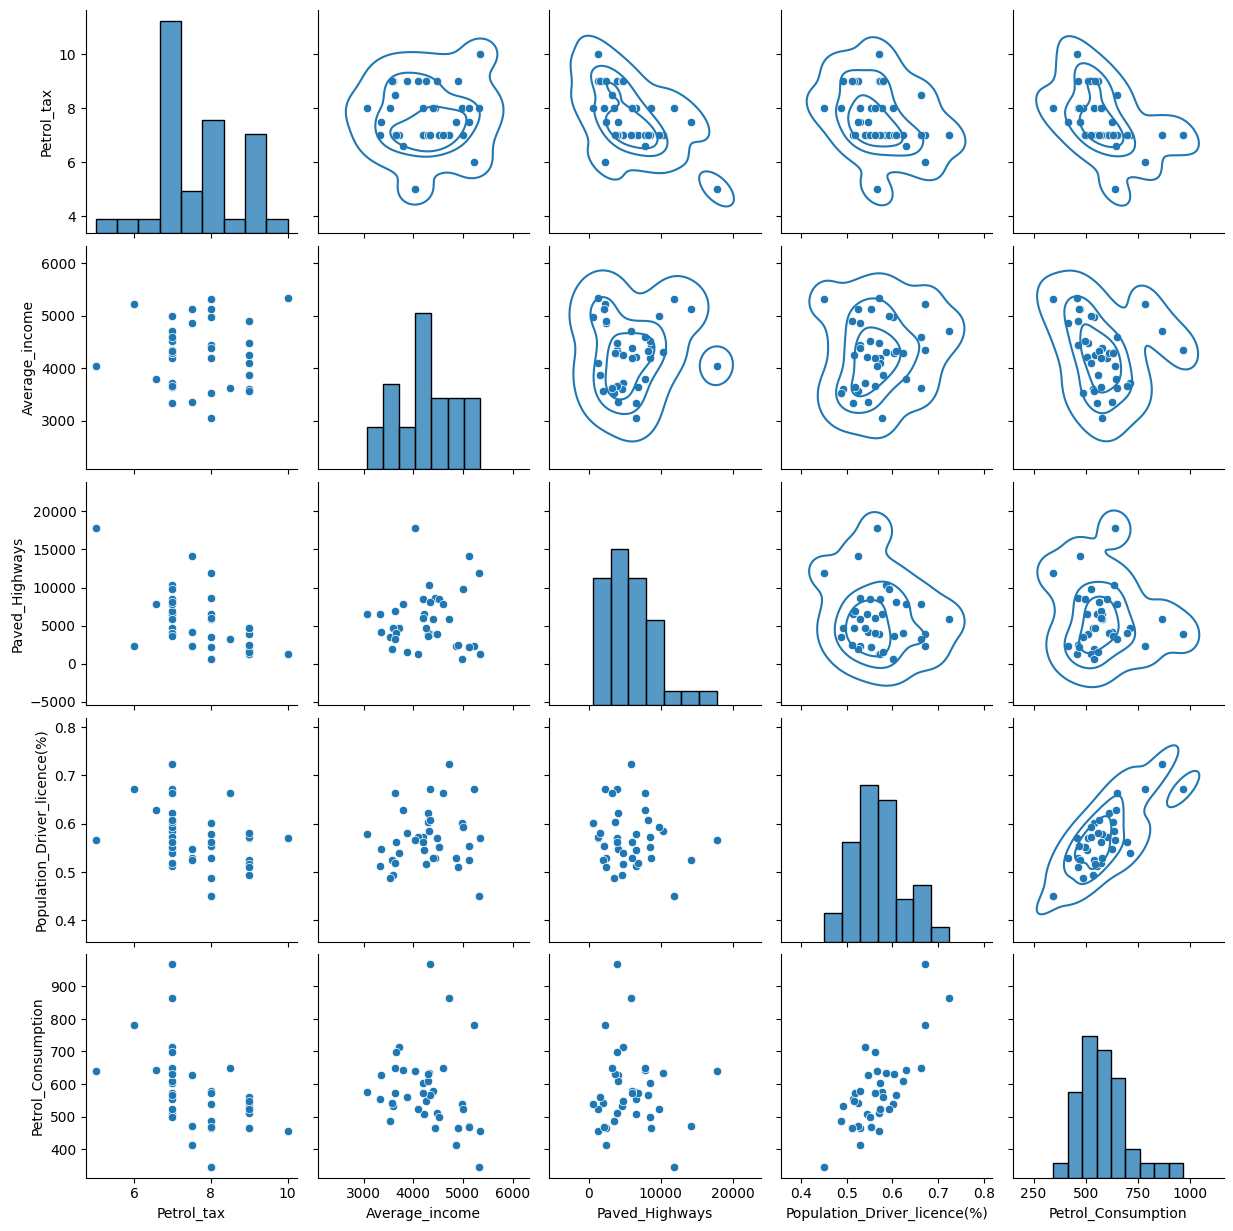

In [4]:
the_ppplot = sns.pairplot(data=df_train, diag_kind='hist')

the_ppplot.map_upper(sns.kdeplot, levels=4)

plt.show()

In [5]:
df_train.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.035224,-0.557169,-0.338274,-0.468701
Average_income,0.035224,1.000000,0.063792,0.130655,-0.221793
Paved_Highways,-0.557169,0.063792,1.000000,-0.128690,-0.065765
Population_Driver_licence(%),-0.338274,0.130655,-0.128690,1.000000,0.742374
Petrol_Consumption,-0.468701,-0.221793,-0.065765,0.742374,1.000000


In [6]:
X_train = df_train.drop(['Petrol_Consumption'], axis=1)

X_test = df_test.drop(['Petrol_Consumption'], axis=1)

y_train = df_train.Petrol_Consumption

y_test = df_test['Petrol_Consumption']

In [7]:
# Scaling

scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train)

X_test_sc = scaler.transform(X_test)

In [8]:
# Linear Regression

model_lr = LinearRegression()

model_lr.fit(X_train_sc, y_train)

y_hat_lr = model_lr.predict(X_test_sc)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_hat_lr))}")
print(f"R2: {r2_score(y_test, y_hat_lr)}")

rmse_lr = np.sqrt(mean_squared_error(y_test, y_hat_lr))

r2_lr = r2_score(y_test, y_hat_lr)

RMSE: 63.900358932836966
R2: 0.3913664001428856


In [9]:
# Lasso

model_ls = Lasso(random_state=2014)

model_ls.fit(X_train_sc, y_train)

y_hat_ls = model_ls.predict(X_test_sc)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_hat_ls))}")
print(f"R2: {r2_score(y_test, y_hat_ls)}")

rmse_ls = np.sqrt(mean_squared_error(y_test, y_hat_ls))

r2_ls = r2_score(y_test, y_hat_ls)

RMSE: 63.57590818093325
R2: 0.39753132022876303


In [10]:
# Decision Tree

model_tr = DecisionTreeRegressor(random_state=2014)

model_tr.fit(X_train_sc, y_train)

y_hat_tr = model_tr.predict(X_test_sc)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_hat_tr))}")
print(f"R2: {r2_score(y_test, y_hat_tr)}")

rmse_tr = np.sqrt(mean_squared_error(y_test, y_hat_tr))

r2_tr = r2_score(y_test, y_hat_tr)

RMSE: 130.18755700910899
R2: -1.5263195550977877


In [11]:
# Random Forest

model_rf = RandomForestRegressor(random_state=2014)

model_rf.fit(X_train_sc, y_train)

y_hat_rf = model_rf.predict(X_test_sc)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_hat_rf))}")
print(f"R2: {r2_score(y_test, y_hat_rf)}")

rmse_rf = np.sqrt(mean_squared_error(y_test, y_hat_rf))

r2_rf = r2_score(y_test, y_hat_rf)

RMSE: 88.19885078616389
R2: -0.15951182386356022


In [12]:
# Random Forest with Grid Search

param_grid = {
    # RandomForestRegressor().get_params().keys()
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [3, 5, 7],
    'random_state': [2014]
}

grid_search_rf = GridSearchCV(model_rf, param_grid=param_grid, n_jobs=-1)

grid_search_rf.fit(X_train_sc, y_train)

y_hat_gs_rf = grid_search_rf.predict(X_test_sc)

print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_hat_gs_rf))}")
print(f"R2: {r2_score(y_test, y_hat_gs_rf)}")

rmse_gs_rf = np.sqrt(mean_squared_error(y_test, y_hat_gs_rf))

r2_gs_rf = r2_score(y_test, y_hat_gs_rf)

RMSE: 77.23792570797185
R2: 0.11077731671406454


In [13]:
rmse_list = []

rmse_list.append(rmse_lr)
rmse_list.append(rmse_ls)
rmse_list.append(rmse_tr)
rmse_list.append(rmse_rf)
rmse_list.append(rmse_gs_rf)

r2_list = []

r2_list.append(r2_lr)
r2_list.append(r2_ls)
r2_list.append(r2_tr)
r2_list.append(r2_rf)
r2_list.append(r2_gs_rf)

In [14]:
cm = sns.light_palette('red', as_cmap=True)

model_compare = pd.DataFrame({'model_name': ['linear regression', 'lasso', 'decision tree', 'random forest', 'grid search rf'], 'RMSE': rmse_list, 'R2': r2_list})

model_compare.style.background_gradient(cmap=cm)

,model_name,RMSE,R2
0,linear regression,63.900359,0.391366
1,lasso,63.575908,0.397531
2,decision tree,130.187557,-1.526320
3,random forest,88.198851,-0.159512
4,grid search rf,77.237926,0.110777


In [15]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [16]:
Lasso().get_params().keys()

# alpha = penalty

dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])

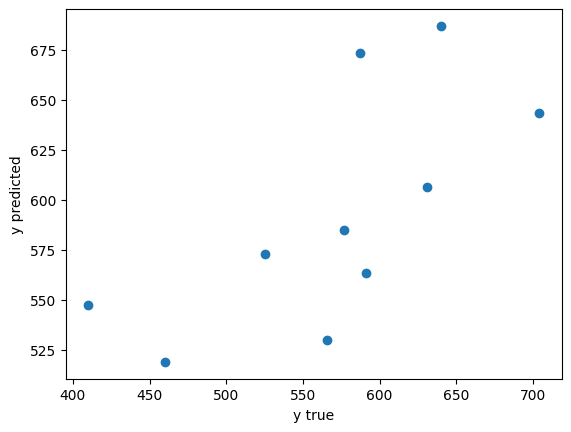

In [17]:
plt.scatter(x=y_test, y=y_hat_lr)
plt.xlabel('y true')
plt.ylabel('y predicted')
plt.show()

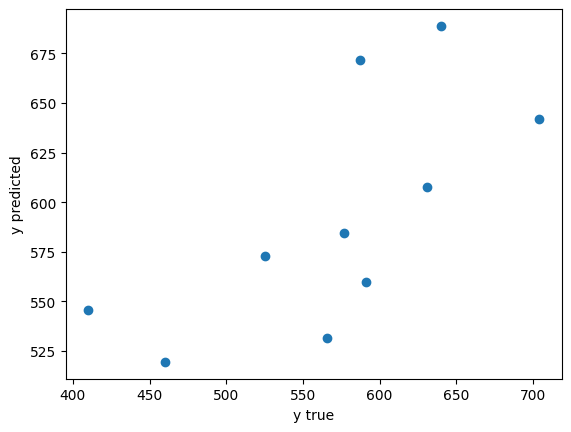

In [18]:
plt.scatter(x=y_test, y=y_hat_ls)
plt.xlabel('y true')
plt.ylabel('y predicted')
plt.show()

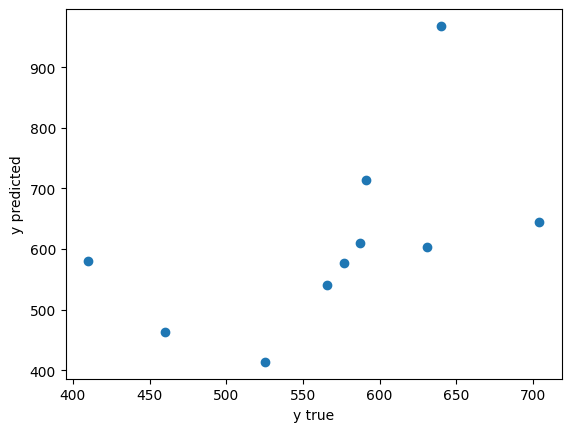

In [19]:
plt.scatter(x=y_test, y=y_hat_tr)
plt.xlabel('y true')
plt.ylabel('y predicted')
plt.show()

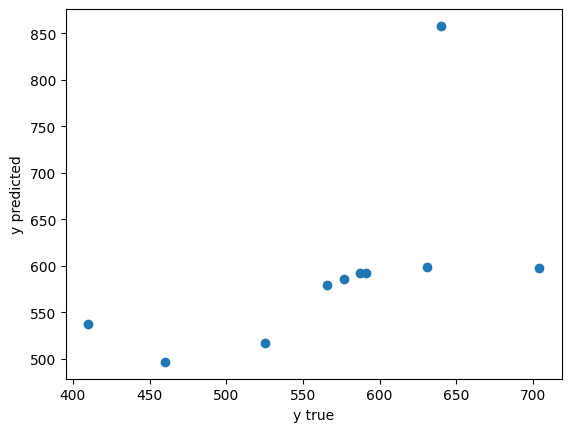

In [20]:
plt.scatter(x=y_test, y=y_hat_rf)
plt.xlabel('y true')
plt.ylabel('y predicted')
plt.show()

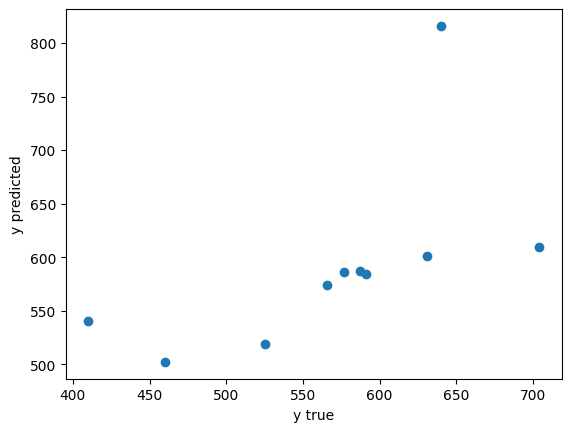

In [21]:
plt.scatter(x=y_test, y=y_hat_gs_rf)
plt.xlabel('y true')
plt.ylabel('y predicted')
plt.show()